In [7]:
import os
import sys
import pandas as pd
import yfinance as yf
import numpy as np
sys.path.append(os.path.join('Momentum_additional_files'))

from config import *
from helper import *
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

price_data_df = collecting_data(START_DATE, END_DATE, DATA_OPEN_LOC, DATA_DIV_LOC)
relative_df = get_relative(price_data_df)

In [8]:
open_positions, total_gained_valued = momentum_strategy(price_data_df, relative_df)
avg_gain, p_value = calc_one_sided_test(open_positions)  
print(f'Average gain:{avg_gain}. The p-value: {p_value}')

Average gain:-11.819352357999541. The p-value: 0.34822553615076024


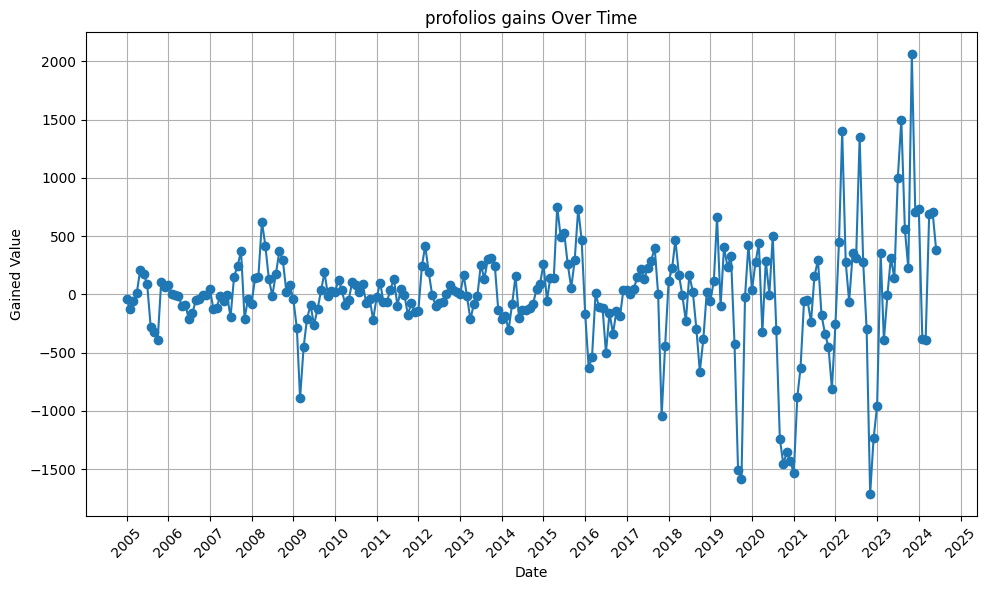

In [9]:
plot_profolios(open_positions)   

In [18]:
b_date, e_date = calc_profolios_dates(START_DATE, END_DATE, FORMATION_PERIOD_MONTHS, HOLDING_PERIOD_MONTHS)
sp500 = yf.download('^GSPC', start=b_date, end=e_date, interval='1mo')[STOCK_TIME]
risk_free_rate = get_risk_free_rate(START_DATE, END_DATE)
sp500_returns = sp500.pct_change().dropna()

strategy_returns =  pd.Series({v['date']: v['rel_gained'] for v in open_positions.values()}) - 1
metrics = calculate_metrics(strategy_returns, sp500_returns, risk_free_rate)

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Annualized Return: -0.0564
Volatility: 0.1864
Sharpe Ratio: -16.2057
Max Drawdown: -0.8200
VaR 1%: -0.1283
VaR 5%: -0.0868
Alpha: -0.7609


# sub group of dates 2004-2017

In [13]:
end_date = '2017-12-31'
sub_relative_df = relative_df.loc[:end_date]
sub_open_positions, sub_total_gained_valued = momentum_strategy(price_data_df, sub_relative_df)
sub_avg_gain, sub_p_value = calc_one_sided_test(sub_open_positions)  
print(f'Average gain:{sub_avg_gain}. The p-value: {sub_p_value}')

Average gain:12.128172450736841. The p-value: 0.2570592194467385


In [14]:
strategy_returns =  pd.Series({v['date']: v['rel_gained'] for v in sub_open_positions.values()}) - 1
metrics = calculate_metrics(strategy_returns, sp500_returns, risk_free_rate)

for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Annualized Return: -0.0385
Volatility: 0.2019
Sharpe Ratio: -14.8723
Max Drawdown: -0.7195
VaR 1%: -0.1701
VaR 5%: -0.0812
Alpha: -0.5474


# Stock prices Over Time'

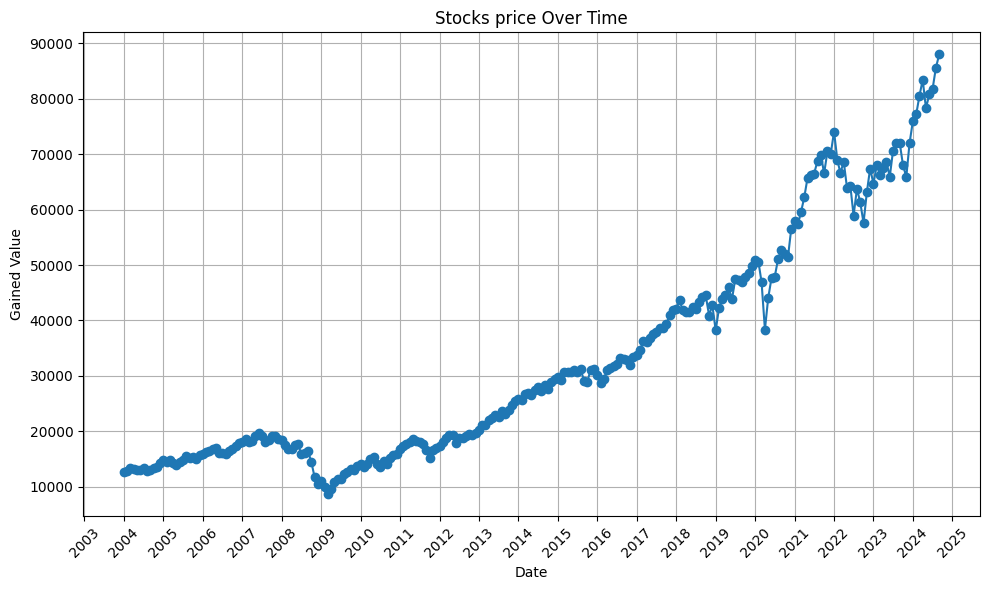

In [50]:
df = price_data_df['Open'] + price_data_df['Dividends']
df = df.sum(axis=1)
plt.figure(figsize=(10, 6))
df.index = pd.to_datetime(df.index)
plt.plot(df.index, df.values, marker='o', linestyle='-')
plt.title('Stock prices Over Time')
plt.xlabel('Date')
plt.ylabel('Gained Value')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.grid()
plt.tight_layout() 
plt.show()

In [2]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get all stock info
for k,v in msft.info.items():
    if 'Risk' in k:
        print(k,v)

auditRisk 3
boardRisk 4
compensationRisk 2
shareHolderRightsRisk 2
overallRisk 1


In [4]:
msft = yf.Ticker("MSFT")
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 